In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from tqdm import tqdm
import matplotlib.pyplot as plt


In [ ]:
 # Download NLTK Resources (only once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [8]:
#  Load Datasets
fake_df = pd.read_csv('../data/dataset/Fake.csv')
true_df = pd.read_csv('../data/dataset/True.csv')

In [9]:
 # Assign Labels
fake_df['label'] = 0  # Fake news
true_df['label'] = 1  # Real news

In [10]:
# Merge Title + Text into a Single Column
fake_df['content'] = fake_df['title'] + ' ' + fake_df['text']
true_df['content'] = true_df['title'] + ' ' + true_df['text']

In [11]:
# Combine Both Datasets (in memory only)
df = pd.concat([fake_df, true_df], ignore_index=True)

In [12]:
# Define Cleaning Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))        # Remove special chars & digits
    text = text.lower()                                # Lowercase
    words = text.split()                               # Tokenize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

In [13]:
# Apply Cleaning with Progress Bar
tqdm.pandas()
df['cleaned_text'] = df['content'].progress_apply(clean_text)

100%|███████████████████████████████████████████████████████████████████████████| 44898/44898 [01:17<00:00, 582.06it/s]


In [14]:
df[['cleaned_text', 'label']].head()

,cleaned_text,label
0,donald trump sends embarrassing new year eve m...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes internet joke thr...,0
3,trump obsessed even obama name coded website i...,0
4,pope francis called donald trump christmas spe...,0


In [15]:
def quick_clean(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    text = text.lower()
    return text

In [16]:
fake_text = " ".join(fake_df['content'].apply(quick_clean))
real_text = " ".join(true_df['content'].apply(quick_clean))


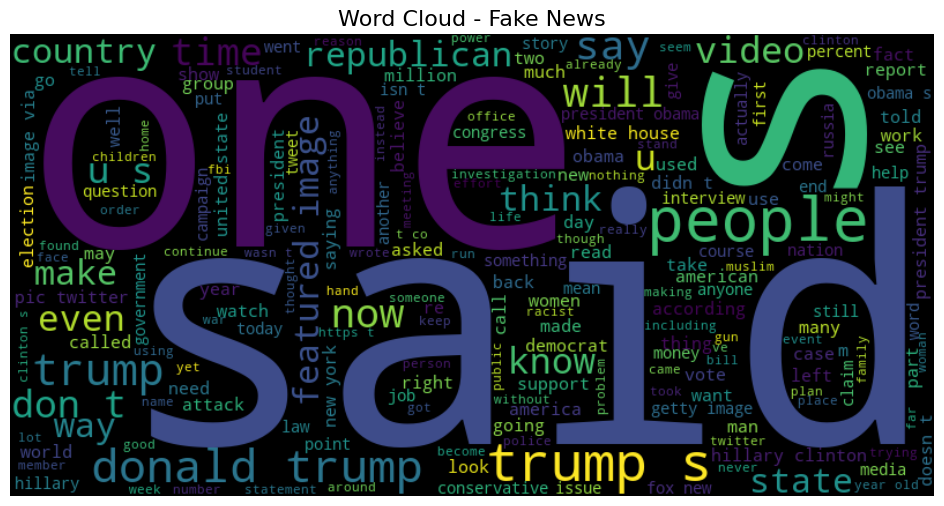

In [17]:
# Fake news word cloud
plt.figure(figsize=(12, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Fake News', fontsize=16)
plt.show()


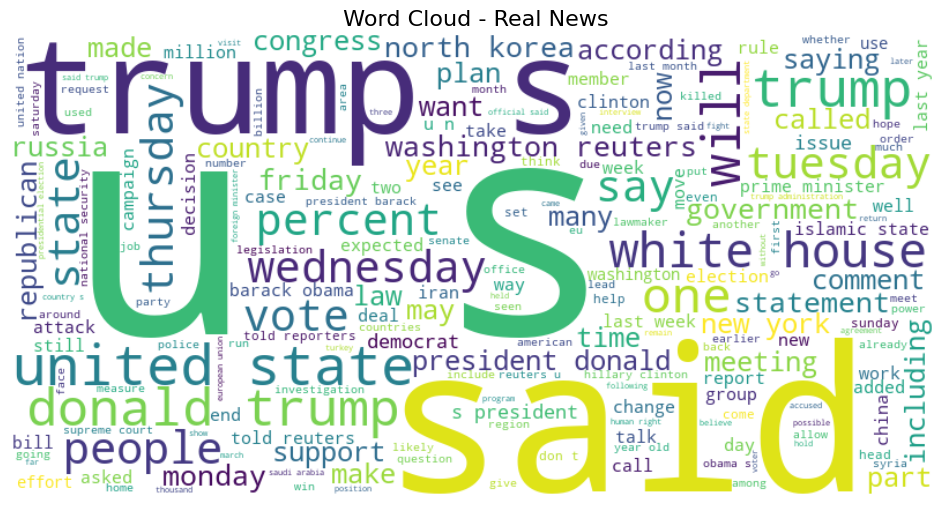

In [18]:
# Real news word cloud
plt.figure(figsize=(12, 6))
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title(' Word Cloud - Real News', fontsize=16)
plt.show()
